<a href="https://www.kaggle.com/code/alisadeghiaghili/how-to-approach-data-problem-1?scriptVersionId=135789101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Car Price Prediction**

# Load needed libraries and file

In [1]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization

In [2]:
df = pd.read_csv("../input/cars-sales-data/cars_sale_data.csv")

# Some basic EDA

In [3]:
df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [4]:
df.tail(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
418,Volvo,S60 2.5 4dr,Sedan,Europe,All,"$31,745","$29,916",2.5,5.0,208,20,27,3903,107,180
419,Volvo,S60 T5 4dr,Sedan,Europe,Front,"$34,845","$32,902",2.3,5.0,247,20,28,3766,107,180
420,Volvo,S60 R 4dr,Sedan,Europe,All,"$37,560","$35,382",2.5,5.0,300,18,25,3571,107,181
421,Volvo,S80 2.9 4dr,Sedan,Europe,Front,"$37,730","$35,542",2.9,6.0,208,20,28,3576,110,190
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5.0,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [5]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [6]:
df.shape

(428, 15)

In [7]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


## Missing Values
Check if there are any missing values in the dataframe.

In [8]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

Then I tried plotting the missing values (I know there were only 2, but let's treat it as part of the procedure!)

<Axes: >

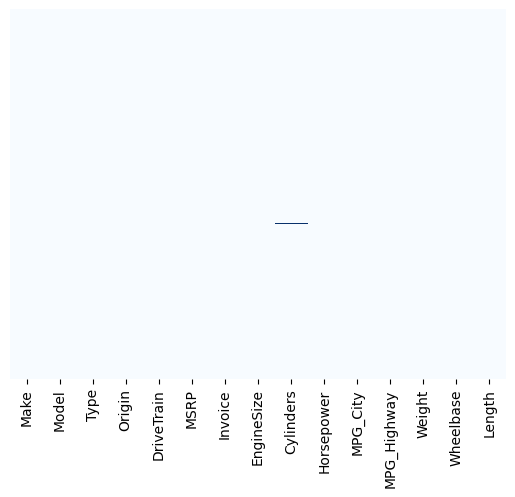

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

Let's get rid of them.

<Axes: >

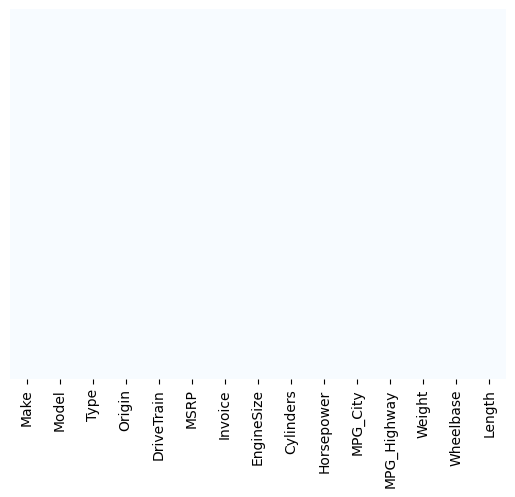

In [10]:
df = df.dropna()
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

## Fixing the MSRP and Invoice columns
As you can see, two of our columns (MSRP & Invoice) are in string format. However, they solely indicate the price. So let's convert them to a numeric format, such as integers.

In [11]:
df["MSRP"] = df["MSRP"].str.replace("$", "", regex = False)\
                       .str.replace(",", "", regex = False)\
                       .astype(int)
df.MSRP

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 426, dtype: int64

In [12]:
df["Invoice"] = df["Invoice"].str.replace("$", "", regex = False)\
                             .str.replace(",", "", regex = False)\
                             .astype(int)
df.Invoice

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 426, dtype: int64

Now, let's check the summary again.

In [13]:
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,32804.549296,30040.654930,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,19472.460825,17679.430122,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,18836.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,27807.500000,25521.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39225.000000,35754.750000,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


## A little bit of visualization
Okay. After all that we've done, it is a good practice to investigate the distributions of variables and the relationships between each pair of variables. A pair plot is extremely helpful in this case. So, let's take a peek!

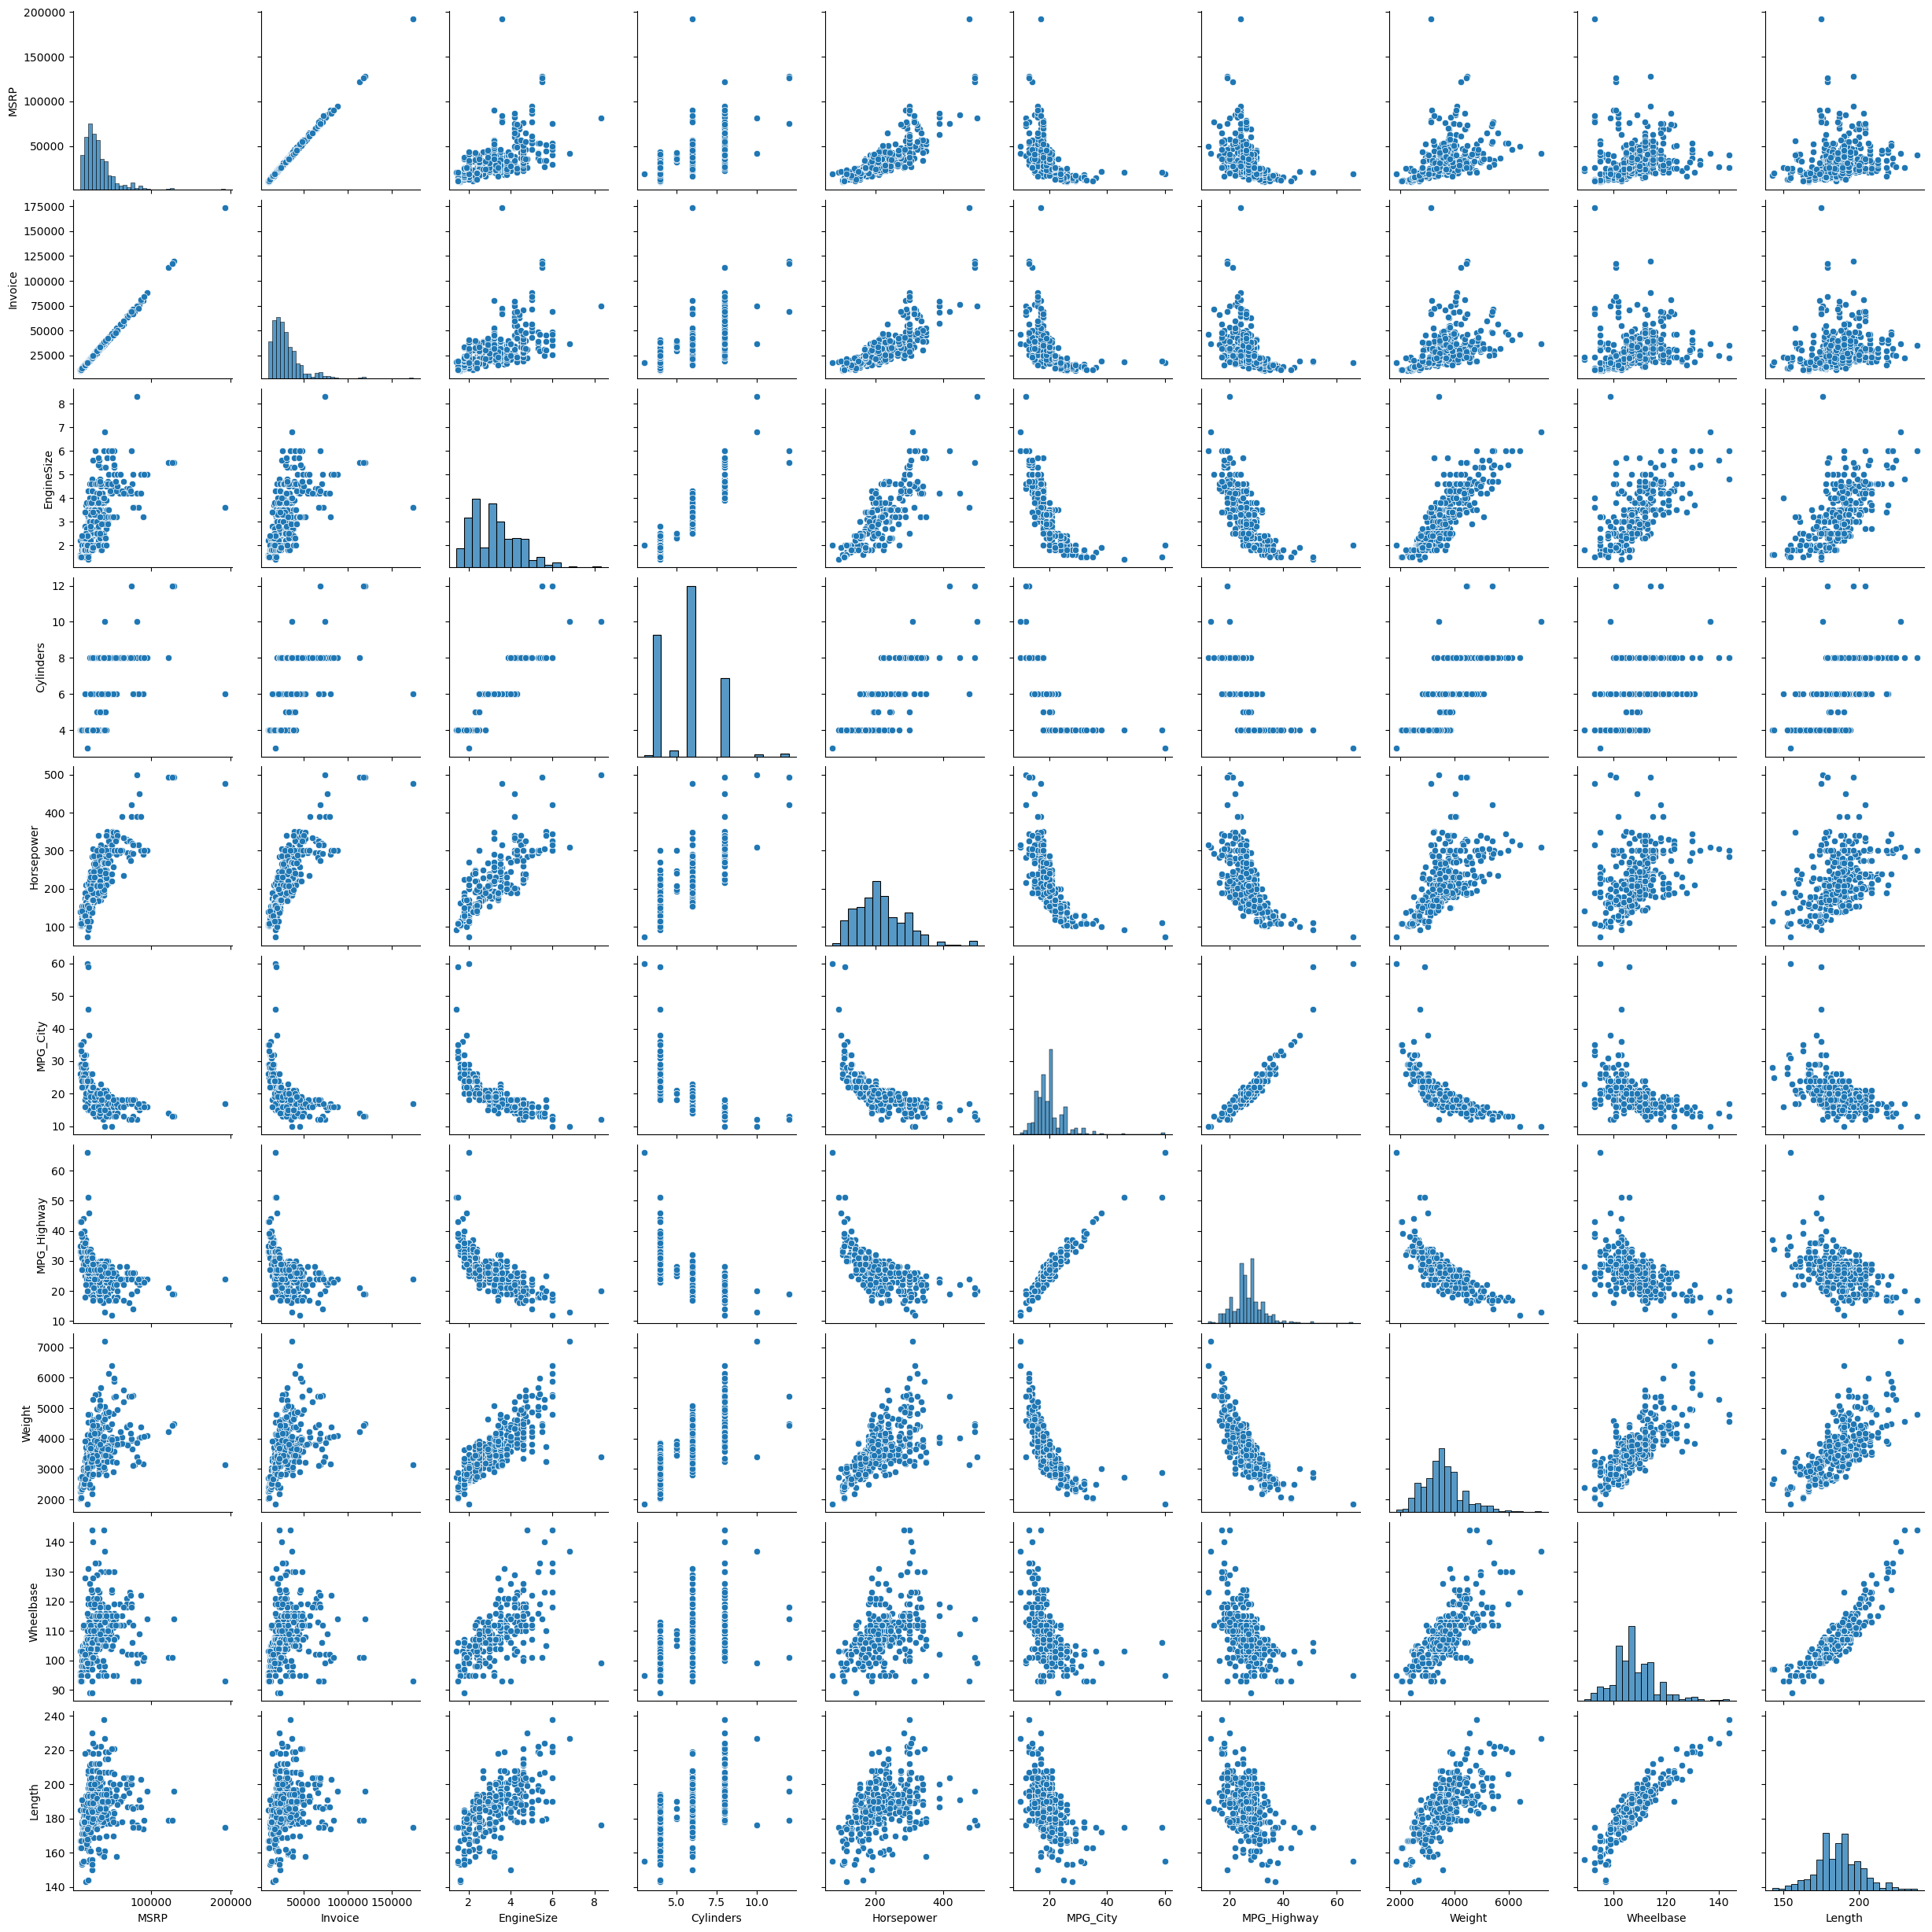

In [14]:
sns.pairplot(df)

And let's also take a peek at the numeric values of correlations.

In [15]:
df.select_dtypes(include='number')\
  .corr()\
  .style\
  .background_gradient(cmap='coolwarm')\
  .format(precision=2)

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.00,1.00,0.57,0.65,0.83,-0.48,-0.44,0.45,0.15,0.17
Invoice,1.00,1.00,0.57,0.65,0.82,-0.47,-0.44,0.44,0.15,0.17
EngineSize,0.57,0.57,1.00,0.91,0.79,-0.72,-0.73,0.81,0.64,0.64
Cylinders,0.65,0.65,0.91,1.00,0.81,-0.68,-0.68,0.74,0.55,0.55
Horsepower,0.83,0.82,0.79,0.81,1.00,-0.68,-0.65,0.63,0.39,0.38
MPG_City,-0.48,-0.47,-0.72,-0.68,-0.68,1.00,0.94,-0.74,-0.51,-0.50
MPG_Highway,-0.44,-0.44,-0.73,-0.68,-0.65,0.94,1.00,-0.79,-0.53,-0.47
Weight,0.45,0.44,0.81,0.74,0.63,-0.74,-0.79,1.00,0.76,0.69
Wheelbase,0.15,0.15,0.64,0.55,0.39,-0.51,-0.53,0.76,1.00,0.89
Length,0.17,0.17,0.64,0.55,0.38,-0.50,-0.47,0.69,0.89,1.00


Nice! Let's keep in mind that Invoice is strongly correlated with MSRP (we will consider it again later).

Let's create a dataframe that contains the number of cars from each brand in the dataset and their origin, out of curiosity. Afterward, we can visualize it.

In [16]:
counts = pd.DataFrame(df.Make.value_counts())\
        .reset_index()\
        .rename(columns = {'index':'Name', 'Make': 'Count'})\
        .merge(df, left_on = "Name", right_on = "Make", how = "inner")[["Name", "Count", "Origin"]]\
        .drop_duplicates()\
        .sort_values(["Origin", "Count"], ascending = [True, False])\
        .reset_index(drop = True)
counts

,Name,Count,Origin
0,Toyota,28,Asia
1,Honda,17,Asia
2,Nissan,17,Asia
3,Mitsubishi,13,Asia
4,Hyundai,12,Asia
5,Subaru,11,Asia
6,Lexus,11,Asia
7,Kia,11,Asia
8,Mazda,9,Asia
9,Suzuki,8,Asia


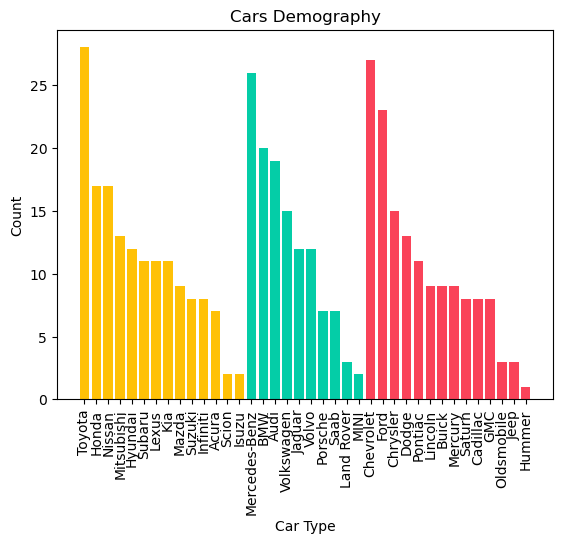

In [17]:
colors = {'Asia': '#ffc107', 'Europe': '#04cda7', 'USA': '#fa4359'}
plt.bar(counts.Name, counts.Count, color = [colors[origin] for origin in counts['Origin']], width = 0.8)
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.title('Cars Demography')
ind = np.arange(counts.shape[0])
plt.xticks(rotation=90)

plt.show()

# Price Prediction
Alright! Now that we have a good understanding of our data, let's dive straight into our main focus: predicting car prices. In this notebook, we will try three different algorithms. Before we proceed to the predictions, let's provide a brief introduction for each of these algorithms. It's important to note that in many cases, we may need to try multiple algorithms to find the one that best suits our specific problem. We'll follow the same approach in this notebook as well.

## Regression
Regression is a *supervised learning* technique used to predict a **continuous or numerical output variable** based on input variables. It involves training a regression model on existing data to approximate the relationship between the input and output variables. The model learns from the patterns in the training data and can make predictions on new, unseen data. Regression models are built using algorithms such as linear regression, polynomial regression, or decision tree regression and so. The goal is to find the best-fit function that can accurately predict the output variable based on the given inputs. Regression problems are widely used in various fields and can be applied to tasks such as stock price prediction, housing price estimation, and demand forecasting.

## Linear Regression
Linear regression is a fundamental technique in machine learning and statistics used to model the relationship between a dependent variable and one or more independent variables. **It assumes a linear relationship between the input variables and the output variable.** In simple linear regression, there is only one independent variable, while multiple linear regression involves multiple independent variables. The goal of linear regression is to find the best-fit line or hyperplane that minimizes the difference between the predicted values and the actual values of the dependent variable.

In linear regression, the relationship between the independent variables and the dependent variable is represented by a linear equation of the form $Y = b_{0} + b_{1}\cdot X_{1} + b{2}\cdot X{2} + ... + b{n}\cdot X{n}$, where $Y$ is the dependent variable, $X_{1}, X_{2}, ..., X_{n}$ are the independent variables, $b_{0}$ is the y-intercept, and $b_{1}, b_{2}, ..., b_{n}$ are the coefficients or weights assigned to each independent variable. The coefficients are estimated using optimization techniques such as *least squares*, where the model is trained to minimize the sum of squared differences between the predicted and actual values. Once the coefficients are determined, the linear regression model can be used to make predictions on new data by plugging in the values of the independent variables into the equation.

Linear regression is a simple and interpretable method that provides insights into the relationship between variables. However, as mentioned before, it assumes a linear relationship, which may not always hold in complex real-world scenarios. In such cases, more advanced regression techniques or feature engineering may be necessary to capture non-linear relationships between variables.

## Multiple Linear Regression
Multiple linear regression is an extension of simple linear regression that allows for the analysis of the relationship between a dependent variable and multiple independent variables. In multiple linear regression, the goal is to find the best-fit hyperplane that relates the dependent variable to the independent variables. **It takes into account the combined effect of all the independent variables on the dependent variable.** The equation for multiple linear regression is similar to that of simple linear regression, but it includes additional terms for each independent variable. This allows for a more comprehensive analysis of how each independent variable contributes to the variation in the dependent variable.

The key contrast between simple linear regression and multiple linear regression lies in the number of independent variables involved. Simple linear regression involves only one independent variable, which makes it suitable for analyzing the relationship between two variables. It is easier to interpret and visualize as it represents a straight line in a two-dimensional space. On the other hand, multiple linear regression considers multiple independent variables, which enables the exploration of more complex relationships involving multiple factors. It provides a more realistic and accurate representation of real-world scenarios where multiple factors influence the dependent variable simultaneously. However, multiple linear regression can be more challenging to interpret and may require additional techniques to handle issues such as multicollinearity (high correlation between independent variables) and variable selection.

To conclude, while simple linear regression analyzes the relationship between a dependent variable and a single independent variable, multiple linear regression extends this analysis to include multiple independent variables. Multiple linear regression offers a more comprehensive understanding of how multiple factors contribute to the variation in the dependent variable, but it can be more complex to interpret and handle. The choice between simple and multiple linear regression depends on the specific problem at hand and the complexity of the relationship being studied.

Alright! Now that we have a sufficient understanding of **Linear Regression**, let's proceed with some data preparation and then feed the prepared data into the algorithm.

# One Hot Encoding (Dummifcation)
**One hot encoding** is a technique used  to convert categorical variables into a numerical format. It involves creating binary vectors, also known as "one hot" vectors, where each vector represents a category in the categorical variable. *In these binary vectors, only one element is hot (set to 1) while all others are cold (set to 0)*. This representation is one of the ways that allows machine learning algorithms to process categorical data effectively.

## Benefits

One hot encoding offers several benefits: 
1. It preserves the categorical information by representing each category as a separate feature, without assuming any numerical relationship between them. 
2. It provides an efficient representation as it requires a relatively small number of features to represent the categorical variable. 
3. Lastly, it ensures compatibility with machine learning algorithms that expect numerical inputs. 
However, it's important to be mindful of the increased dimensionality that can arise when dealing with a large number of categories, which may impact model performance. In such cases, alternative encoding techniques like label encoding or ordinal encoding may be more appropriate.

Lets take it into action.

In [18]:
dummified = pd.get_dummies(df, columns = ['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])
dummified.head()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,0,0,0,0,1,0,0,1,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,1,0,0,0,1,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,...,1,0,0,0,1,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,...,1,0,0,0,1,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,...,1,0,0,0,1,0,0,0,1,0


Alright then. As we mentioned before, the Invoice column is highly correlated with MSRP (you can take a quick look at the visuals if needed). Therefore, we can omit this column.

In [19]:
dummified = dummified.drop('Invoice', axis = 1)
dummified.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0


After this, let's separate our data into the target variable (MSRP, let's call it y) and the variables other than the target variable (let's call them X).

In [20]:
X = dummified.drop('MSRP', axis = 1)
y = dummified['MSRP']

# Train & Test split
I know, I know ... you already know it! But be kind and let me take a quick review of it.

Train-test splitting refers to the process of dividing a dataset into two separate subsets: a training set and a testing (or validation) set. This technique is commonly used in machine learning and other AI applications to evaluate the performance of a model.

The training set is used to train the AI model. During this phase, the model learns patterns, relationships, and generalizes from the provided data. *The training set should ideally contain a large and representative sample of the available data.*

The testing set is used to assess how well the trained model performs on unseen data. It serves as an independent dataset that was not used during the training phase. *By evaluating the model's performance on the testing set, we can estimate how well it will generalize to new, unseen data.*

The main goal of train-test splitting is to assess the model's performance on unseen data and detect potential issues such as overfitting. **Overfitting** occurs when a model becomes too specialized to the training data and performs poorly on new data. By using a separate testing set, we can identify overfitting and make adjustments to improve the model's generalization ability.

Typically, the training set and testing set are created by randomly partitioning the original dataset. The most common approach is the 70-30 or 80-20 split, where 70% or 80% of the data is used for training, and the remaining 30% or 20% is used for testing (Keep in mind that these percentages can vary depending on the specific application and dataset size).

**In summary, train-test splitting is an essential step in AI model development to evaluate and validate the model's performance on unseen data, ensuring its ability to generalize well.**

Now lets split our data using **Scikit-Learn**.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Alright! Now that everything is ready, let's proceed with training our model.

In [22]:
from sklearn.linear_model import LinearRegression
model_linearRegression = LinearRegression()
model_linearRegression.fit(X_train, y_train)

LinearRegression()

Now, let's measure the accuracy of our model.

In [23]:
accuracy_linearRegrassion = model_linearRegression.score(X_test, y_test)
accuracy_linearRegrassion

0.7811332607098913

## Decision Trees
Decision trees are a type of machine learning algorithm used for both classification and regression tasks. They represent a flowchart-like structure where each node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome or class label. The goal is to build a model that predicts the value of a target variable based on input variables. The decision tree is constructed by selecting the best attribute as the root node, splitting the data based on the attribute values, recursively creating child nodes, and assigning labels at the leaf nodes. To make predictions, new data is traversed through the tree based on attribute values.

Decision trees are relatively easy to understand and interpret, making them suitable for beginners. However, they can be prone to overfitting, where the model memorizes the training data too well and performs poorly on new data. Techniques like pruning and ensemble methods such as random forests can be used to address this issue.

Let's try it

In [24]:
from sklearn.tree import DecisionTreeRegressor
model_decisionTree = DecisionTreeRegressor()
model_decisionTree.fit(X_train, y_train)

DecisionTreeRegressor()

Now let's measure our model's accuracy.

In [25]:
accuracy_decisionTree = model_decisionTree.score(X_test, y_test)
accuracy_decisionTree

0.7833388566111013

## Ensemble Learning
Ensemble learning is a machine learning technique that combines the predictions of multiple individual models to make more accurate and robust predictions. Instead of relying on a single model, ensemble learning leverages the diversity and collective knowledge of multiple models to improve overall performance.

**The idea behind ensemble learning is that by combining the predictions of different models, the strengths of some models can compensate for the weaknesses of others.** This helps to reduce bias and variance, leading to more accurate and reliable predictions.

There are various ensemble learning methods, such as Random Forest, Bagging, Boosting, and Stacking. Each method employs different strategies for creating and combining the individual models.

In nutshell, ensemble learning is a powerful approach that combines multiple models to enhance prediction accuracy and robustness.

## Bagging
Bagging, or bootstrap aggregating, is an ensemble learning technique. **It involves training multiple models on different subsets of the training data and combining their predictions to improve accuracy**. First, the data is randomly sampled with replacement to create multiple subsets. Each subset is used to train a separate model. Finally, the predictions of all the models are aggregated to obtain the final prediction. Bagging reduces variance, improves generalization, and provides robustness to outliers. It is particularly effective with high-variance algorithms like decision trees.

To conclude, bagging is an ensemble technique that uses multiple models trained on different subsets of the data to make predictions. By combining these predictions, it improves accuracy and stability. It is widely used in machine learning, especially with algorithms that are prone to overfitting.

## Random Forest
Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy. It works by randomly selecting subsets of the training data and features. Each subset is used to train a separate decision tree. By leveraging the diversity and collective knowledge of the trees, Random Forest provides more robust and accurate predictions compared to a single decision tree. During prediction, the final output is determined by combining the predictions of all the individual trees, either by majority voting for classification tasks or by averaging for regression tasks.

To recap, Random Forest is a powerful technique that harnesses the strength of multiple decision trees. It enhances prediction accuracy by using random subsets of data and features for each tree and combining the predictions of all the trees. Random Forest is widely used in various machine learning applications due to its ability to handle complex problems and mitigate overfitting.

Ok then. let's implement it.

In [26]:
from sklearn.ensemble import RandomForestRegressor
model_randomForest = RandomForestRegressor(n_estimators = 5, max_depth = 5)
model_randomForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

As always, let's measure our model's accuracy.

In [27]:
accuracy_randomForest = model_randomForest.score(X_test, y_test)
accuracy_randomForest

0.7821689621506154

## Boosting
Boosting is an ensemble learning technique that **combines multiple simple models called *weak learners* to create a powerful predictive model.** It works by training weak learners sequentially, with each subsequent learner focusing on the examples that previous learners struggled with. The training examples are assigned weights, and the weights are adjusted based on the performance of each learner. The final model is a combination of the weak learners' predictions, typically using a weighted voting scheme. Boosting aims to improve the overall accuracy of the model by iteratively emphasizing difficult examples and leveraging the strengths of the weak learners.

To put it simply, boosting involves building a sequence of weak models, where each model tries to improve upon the mistakes of its predecessors. By iteratively focusing on challenging examples, boosting creates a strong ensemble model that can make accurate predictions on unseen data.

## Gradient Boosting
Gradient boosting is a technique that combines weak models, often decision trees, to create a stronger predictive model. It works by iteratively training new models that focus on reducing the errors made by the previous models. The process starts with an initial model that predicts the average value of the target variable. The errors, or residuals, are then calculated by taking the difference between the actual values and the predictions made by the current ensemble. A new model is trained to capture and correct the patterns in the residuals. The predictions of the new model are added to the ensemble, and this process is repeated for a specified number of iterations. By continuously learning from the mistakes made by the ensemble, gradient boosting improves the predictions and creates a powerful model.

In summary, gradient boosting combines weak models into a stronger ensemble by iteratively training new models to correct the errors made by the previous models. It uses the residuals to guide the updates made to the models. This technique is widely used for various machine learning tasks and is known for its ability to handle complex datasets and deliver high predictive performance.

## XGBoost
XGBoost, short for **eXtreme Gradient Boosting**, is an algorithm used for regression and classification tasks. It combines multiple decision trees in an iterative process called boosting. XGBoost uses gradient boosting to determine the updates made to the model during each iteration, effectively learning from mistakes. The final predictions are obtained by summing the predictions made by each tree in the ensemble.

In essence, XGBoost is a powerful algorithm that combines decision trees to produce accurate predictions. It iteratively corrects the errors made by the ensemble of trees and continuously improves its predictions by learning from the residuals.

### XGBoost vs. Random Forest: Sequential Boosting vs. Independent Trees
XGBoost and Random Forest are both ensemble learning algorithms that utilize decision trees, but they differ in several key aspects. **Random Forest builds a set of decision trees independently**, where each tree is trained on a random subset of the data and features. **The final prediction is obtained through averaging or voting on the predictions of all the trees**. In contrast, **XGBoost constructs decision trees sequentially in an iterative manner. It starts with a simple tree and adds subsequent trees to correct the mistakes made by the ensemble. Each tree is trained on the residuals of the previous trees and the predictions are combined.** XGBoost employs gradient boosting to guide the updates made to the model during each iteration.

Another distinction lies in the regularization techniques used. **Random Forest applies bagging and random feature selection** to control overfitting. **XGBoost, on the other hand, employs regularization techniques such as shrinkage (learning rate) and feature subsampling to enhance generalization** and prevent overfitting.

Overall, while both XGBoost and Random Forest utilize decision trees in their ensembles, **XGBoost builds trees sequentially** using gradient boosting to correct mistakes, while **Random Forest constructs trees independently** and combines their predictions. Additionally, XGBoost incorporates specific regularization techniques to improve generalization. These differences make **XGBoost particularly effective for handling complex datasets and achieving high predictive accuracy, while Random Forest is known for its simplicity and ability to handle high-dimensional data.**

Now that we had a brief overview of XGBoost let's try it.

In [28]:
from xgboost import XGBRegressor
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

OK. Let's calculate our accuracy again

In [29]:
accuracy_xgboost = model_xgboost.score(X_test, y_test)
accuracy_xgboost

0.8832134793599135

# Models Comparision


**This notebook will be completed incrementally... So please wait for the rest.**